## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_l1l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4]
L2_EXP = [1e-2, 1e-4]

In [7]:
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results_l1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Regulizer = 0.010000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.w

Epoch 41/50
50000/50000 [==============================] - 10s 210us/step - loss: 2.4626 - acc: 0.0968 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 11s 220us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.4626 - acc: 0.0966 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 15s 296us/step - loss: 2.4626 - acc: 0.0967 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 48/50
50000/50

Epoch 42/50
50000/50000 [==============================] - 14s 278us/step - loss: 4.0216 - acc: 0.5674 - val_loss: 4.1215 - val_acc: 0.5215
Epoch 43/50
50000/50000 [==============================] - 13s 255us/step - loss: 3.9897 - acc: 0.5700 - val_loss: 4.0968 - val_acc: 0.5197
Epoch 44/50
50000/50000 [==============================] - 14s 275us/step - loss: 3.9574 - acc: 0.5717 - val_loss: 4.0687 - val_acc: 0.5187
Epoch 45/50
50000/50000 [==============================] - 13s 268us/step - loss: 3.9244 - acc: 0.5729 - val_loss: 4.0426 - val_acc: 0.5218
Epoch 46/50
50000/50000 [==============================] - 13s 267us/step - loss: 3.8926 - acc: 0.5749 - val_loss: 4.0127 - val_acc: 0.5166
Epoch 47/50
50000/50000 [==============================] - 14s 285us/step - loss: 3.8619 - acc: 0.5787 - val_loss: 3.9884 - val_acc: 0.5196
Epoch 48/50
50000/50000 [==============================] - 13s 263us/step - loss: 3.8296 - acc: 0.5803 - val_loss: 3.9581 - val_acc: 0.5250
Epoch 49/50
50000/50

In [8]:
results_l1l2 = {}


for regulizer_ratio_l1 in L1_EXP:
    for regulizer_ratio_l2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer L1 = %.6f, L2 = %.6f" % (regulizer_ratio_l1, regulizer_ratio_l2))
        model = build_mlp_l1l2(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio_l1, l2_ratio=regulizer_ratio_l2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l1-%s-l2-%s" % (str(regulizer_ratio), str(regulizer_ratio_l2))
        results_l1l2[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer L1 = 0.010000, L2 = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 231us/step - loss: 299.3014 - acc: 0.2106 - val_loss: 177.4208 - val_acc: 0.2722
Epoch 2/50
50000/50000 [==============================] - 10s 202us/step - loss: 97.3116 - acc: 0.2658 - val_loss: 40.9675 - val_acc: 0.2699
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 26.3274 - acc: 0.1325 - val_loss: 17.0906 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 11.6563 - acc: 0.1000 - val_loss: 7.2119 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 5.0565 - acc: 0.1000 - val_loss: 3.7151 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 3.0980 - acc: 0.0976 - val_loss: 2.6415 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.5070 - acc: 0.0998 - val

50000/50000 [==============================] - 15s 308us/step - loss: 19.6090 - acc: 0.2169 - val_loss: 18.8149 - val_acc: 0.2926
Epoch 2/50
50000/50000 [==============================] - 12s 244us/step - loss: 18.0872 - acc: 0.3223 - val_loss: 17.3825 - val_acc: 0.3385
Epoch 3/50
50000/50000 [==============================] - 15s 298us/step - loss: 16.7531 - acc: 0.3554 - val_loss: 16.1307 - val_acc: 0.3625
Epoch 4/50
50000/50000 [==============================] - 16s 317us/step - loss: 15.5591 - acc: 0.3727 - val_loss: 14.9942 - val_acc: 0.3768
Epoch 5/50
50000/50000 [==============================] - 13s 260us/step - loss: 14.4677 - acc: 0.3829 - val_loss: 13.9511 - val_acc: 0.3802
Epoch 6/50
50000/50000 [==============================] - 17s 348us/step - loss: 13.4646 - acc: 0.3936 - val_loss: 12.9859 - val_acc: 0.3897
Epoch 7/50
50000/50000 [==============================] - 16s 314us/step - loss: 12.5414 - acc: 0.4000 - val_loss: 12.1004 - val_acc: 0.3966
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 15s 293us/step - loss: 6.2603 - acc: 0.2370 - val_loss: 6.0898 - val_acc: 0.3095
Epoch 2/50
50000/50000 [==============================] - 15s 309us/step - loss: 5.9975 - acc: 0.3308 - val_loss: 5.9274 - val_acc: 0.3512
Epoch 3/50
50000/50000 [==============================] - 13s 257us/step - loss: 5.8741 - acc: 0.3632 - val_loss: 5.8356 - val_acc: 0.3711
Epoch 4/50
50000/50000 [==============================] - 16s 314us/step - loss: 5.7880 - acc: 0.3821 - val_loss: 5.7536 - val_acc: 0.3819
Epoch 5/50
50000/50000 [==============================] - 12s 237us/step - loss: 5.7132 - acc: 0.3948 - val_loss: 5.6880 - val_acc: 0.3952
Epoch 6/50
50000/50000 [==============================] - 12s 240us/step - loss: 5.6468 - acc: 0.4061 - val_loss: 5.6186 - val_acc: 0.4100
Epoch 7/50
50000/50000 [==============================] - 11s 221us/step - loss: 5.5842 - acc: 0.4167 - val_loss: 5.5604 - val_acc: 0.4193
Epoch 8/50
50000/50000 [==============

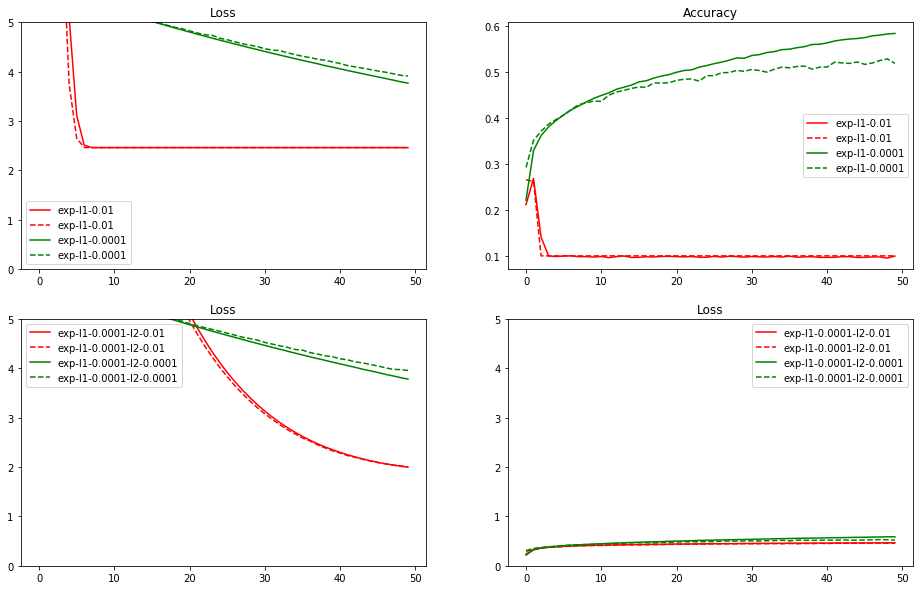

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16,10))
plt.subplot(221)
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-loss'])),results_l1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-loss'])),results_l1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()

plt.subplot(222)
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-acc'])),results_l1[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-acc'])),results_l1[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()

plt.subplot(223)
for i, cond in enumerate(results_l1l2.keys()):
    plt.plot(range(len(results_l1l2[cond]['train-loss'])),results_l1l2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1l2[cond]['valid-loss'])),results_l1l2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()

plt.subplot(224)
for i, cond in enumerate(results_l1l2.keys()):
    plt.plot(range(len(results_l1l2[cond]['train-acc'])),results_l1l2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1l2[cond]['valid-acc'])),results_l1l2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()

plt.show()